# Time Series Race
This exports a sequence of time-series scatterplots to compare how mutiple things changed over time.

#### Imports

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

#### Customize these variables

In [32]:
# These two must have the same size. They correspond one-to-one
time_series_filename = "TimeSeriesRace/dates.txt"
data_filenames = ["TimeSeriesRace/sb737.txt", "TimeSeriesRace/happykids.txt"]
labels = ["SB737", "HappyKidsTV"]

output_filename_base = "TimeSeriesRace/plot"
output_format = ".png"

title = "Subscribers for SB737 vs HappyKidsTV - Nursery Rhymes"
y_label = "Subscribers"

title_fontsize = 18
legend_fontsize = 15
axis_fontsize = 15
linewidth = 3

#### Read the dates into a list

In [24]:
f = open(time_series_filename, 'r')
dates = []  # store as datetime objects
for line in f:
    dates.append(datetime.datetime.strptime(line.strip(), "%m/%d/%y"))
f.close()
number_dates = mdates.date2num(dates)  # store as floats

#### Read the series

In [27]:
data_lists = []
for filename in data_filenames:
    f = open(filename, 'r')
    values = []
    for line in f:
        values.append(float(line.strip()))
    f.close()
    data_lists.append(values)

# Get the min/max for axis limits
smallest = min([min(values) for values in data_lists])
biggest  = max([max(values) for values in data_lists])

### Export the plots

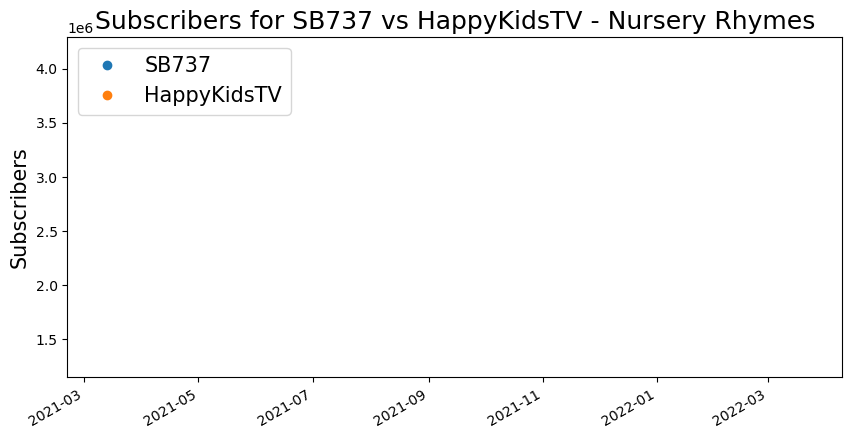

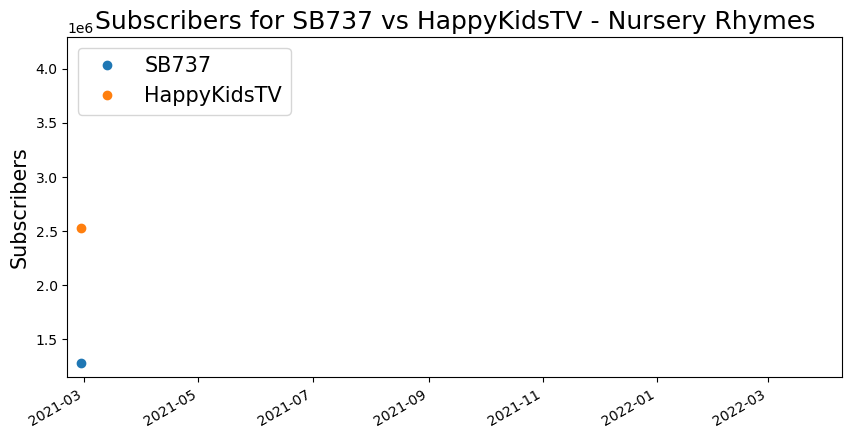

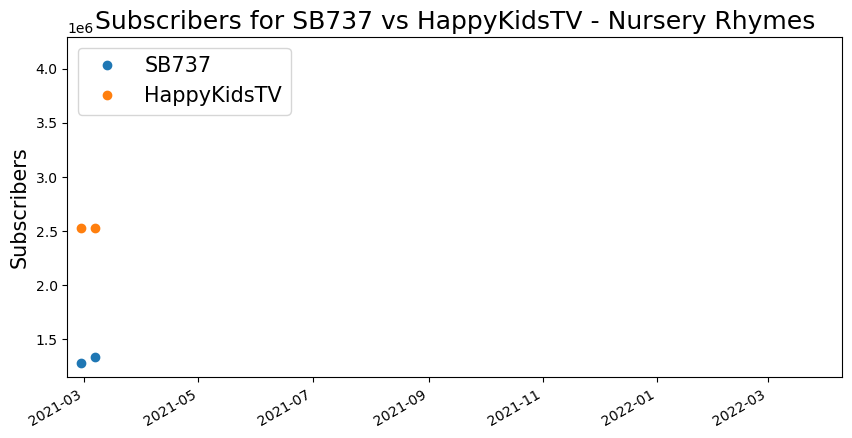

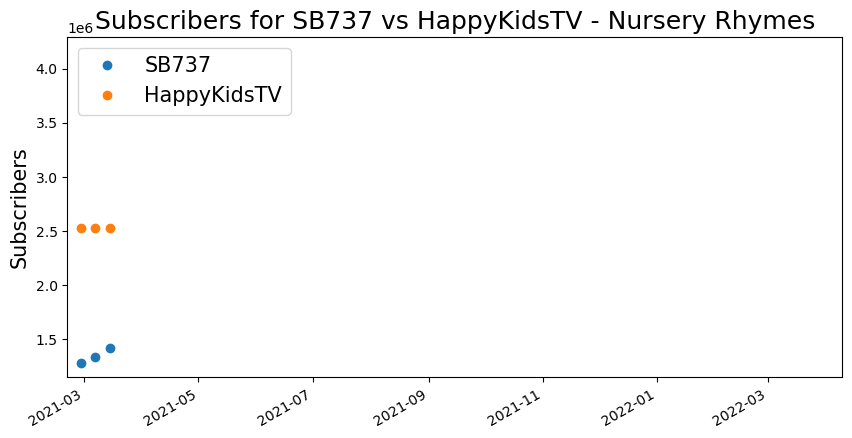

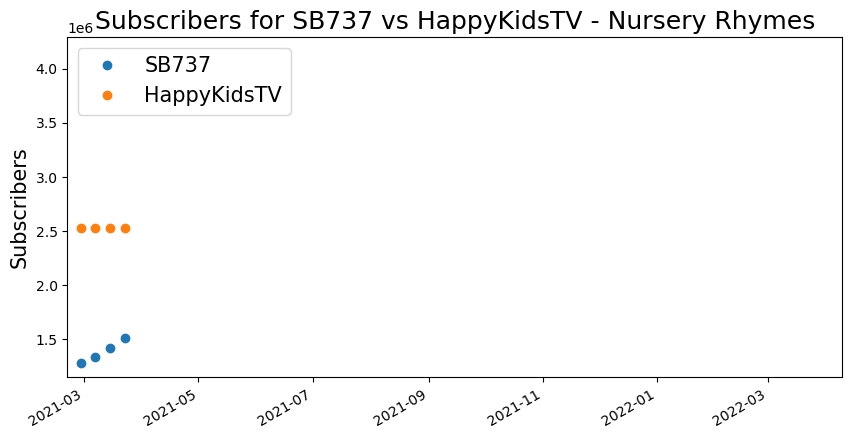

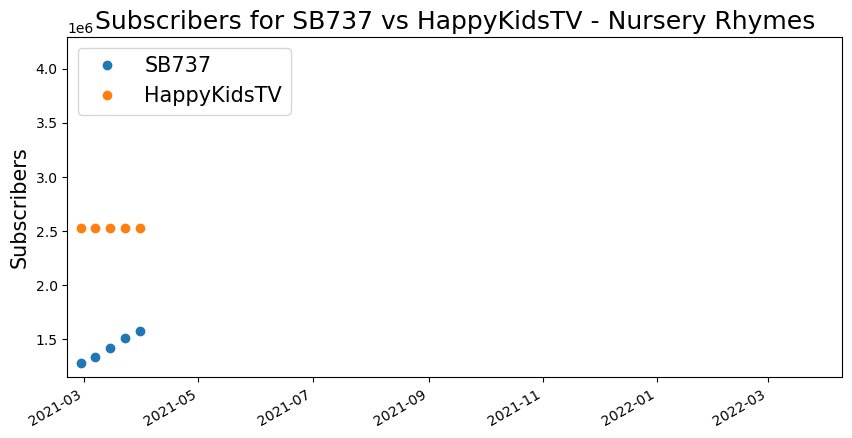

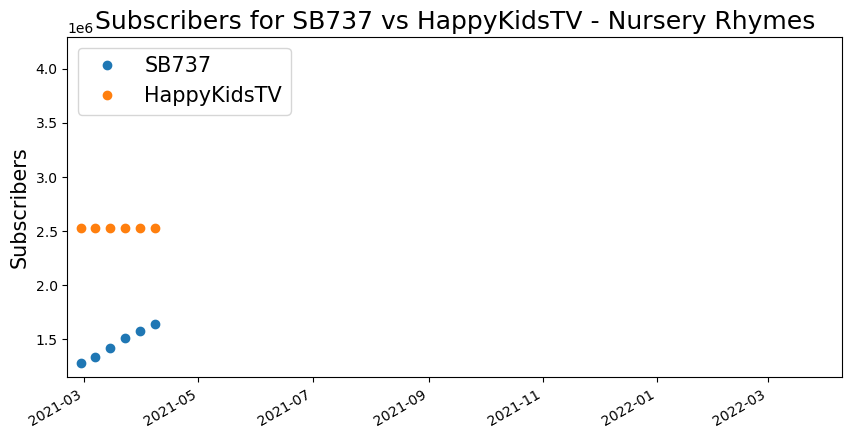

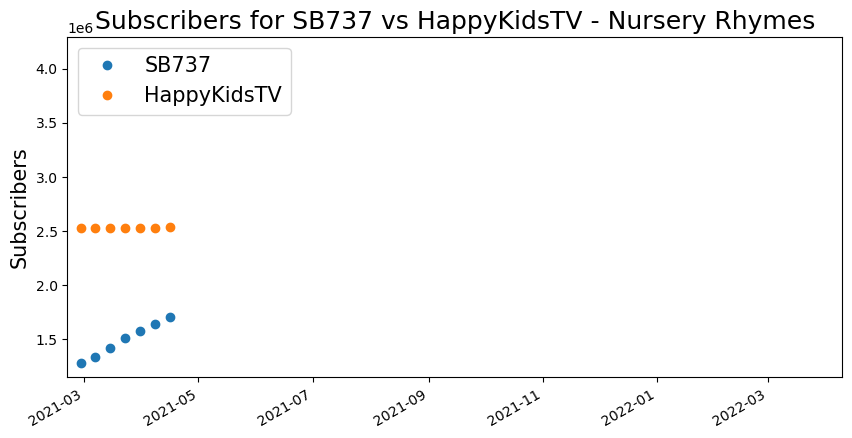

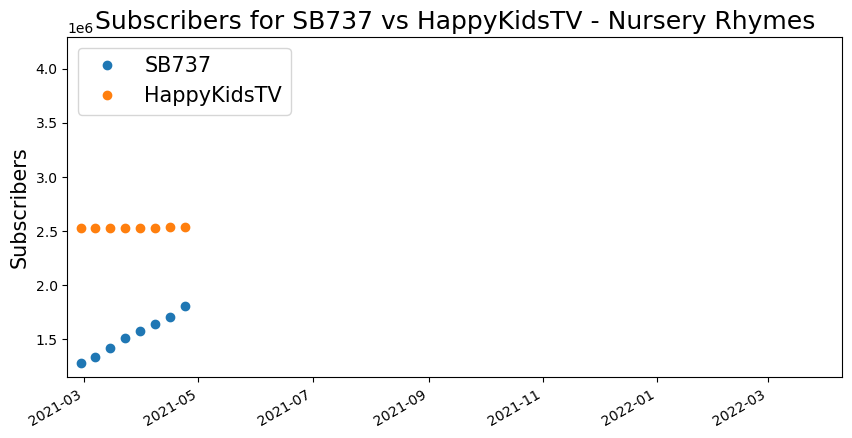

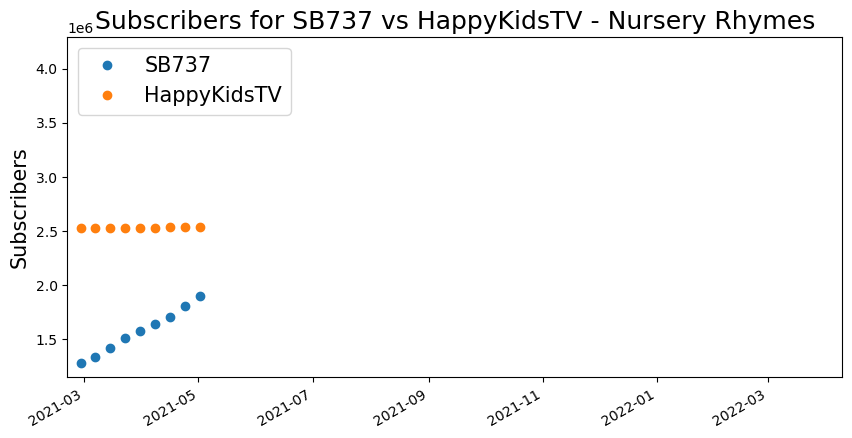

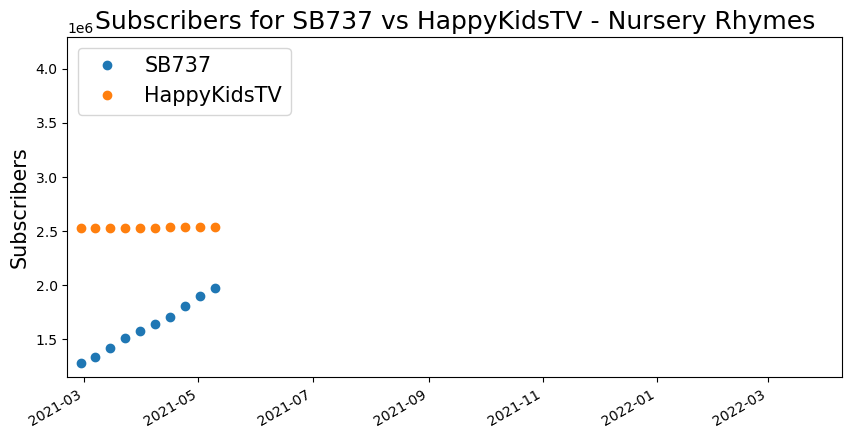

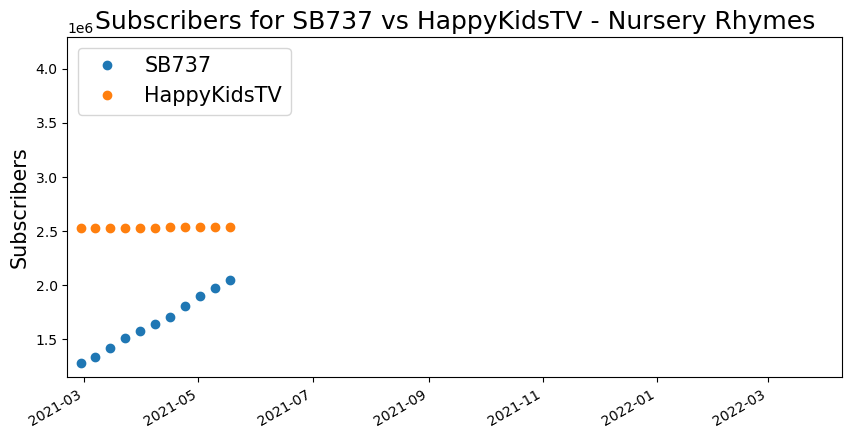

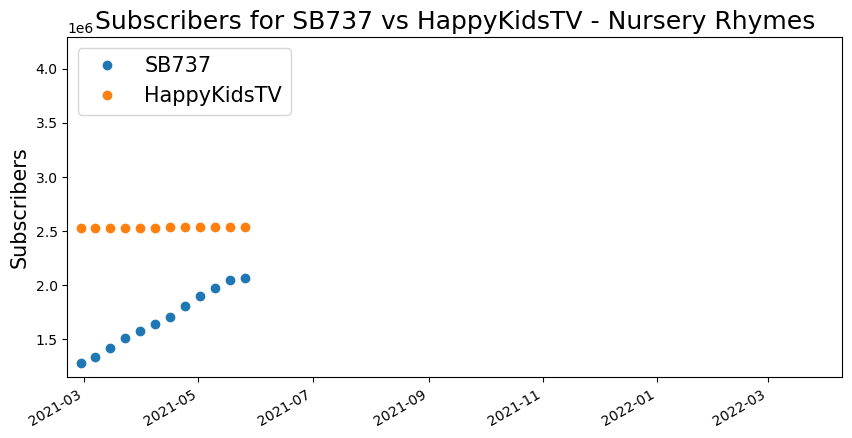

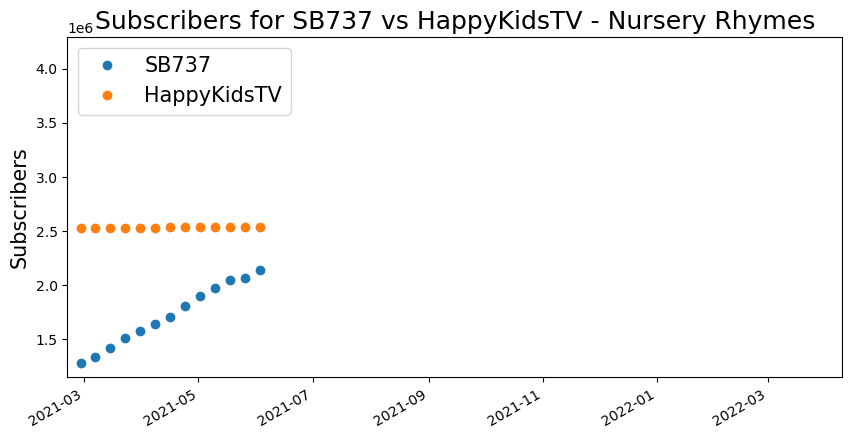

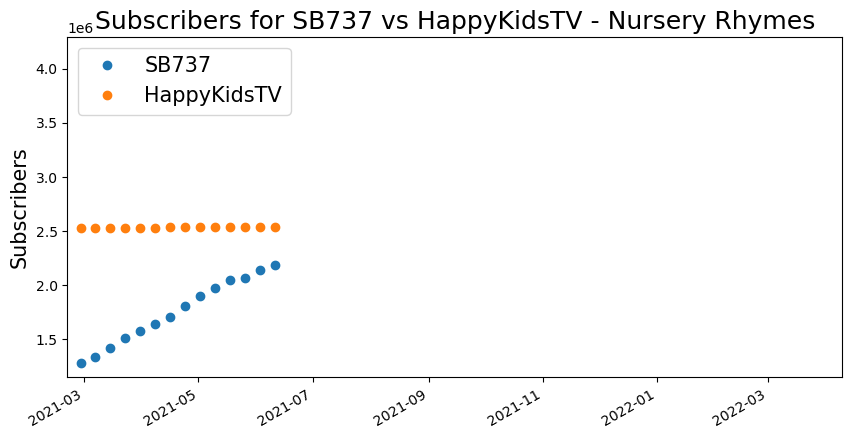

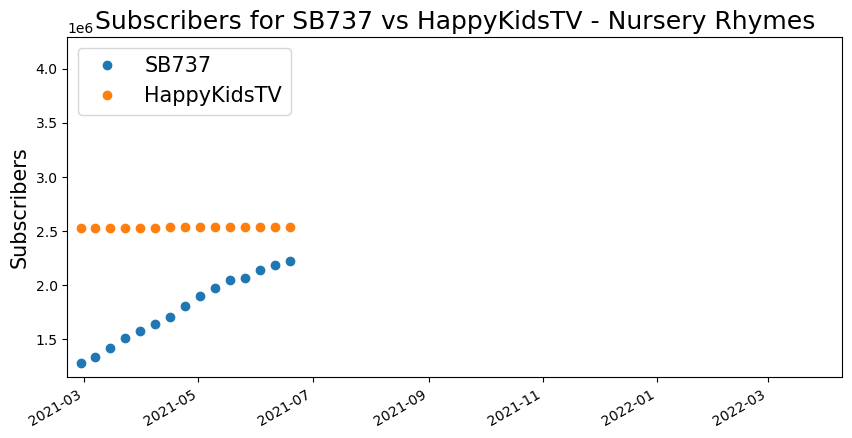

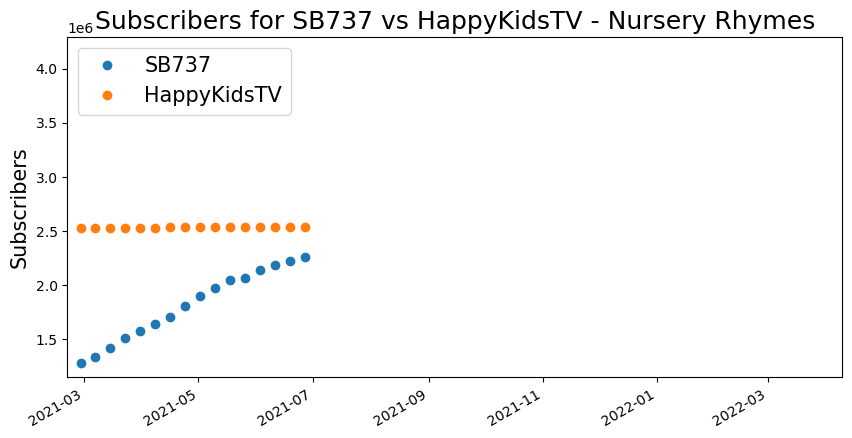

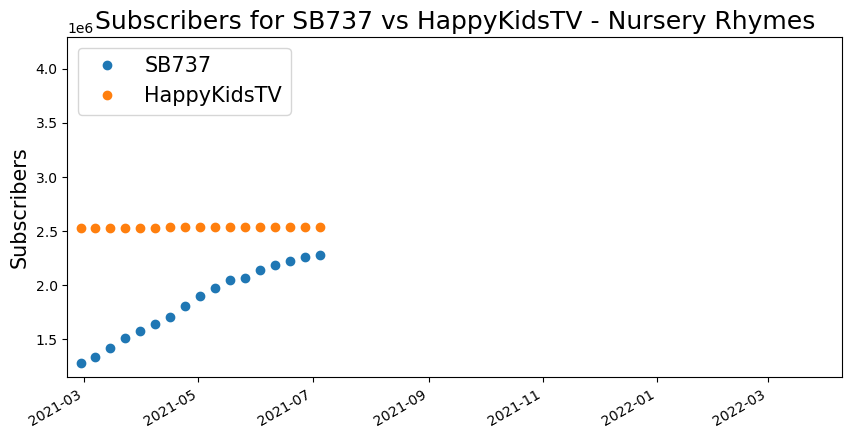

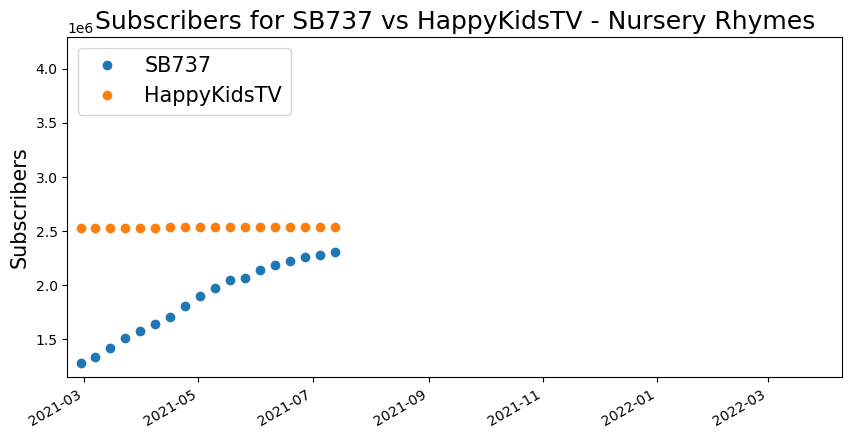

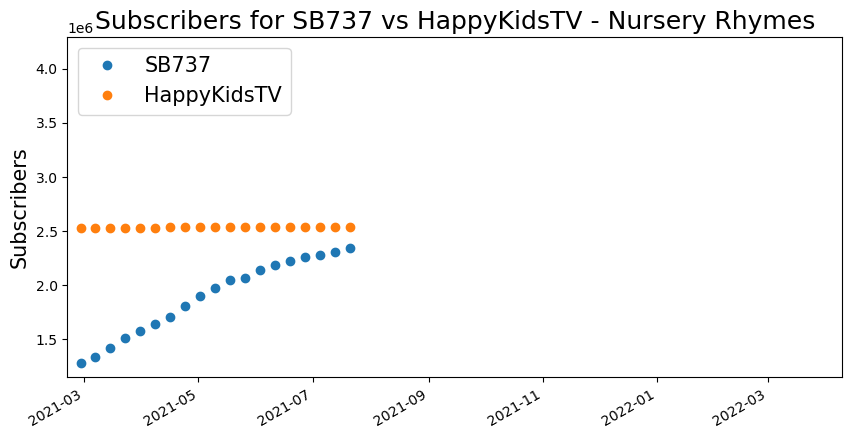

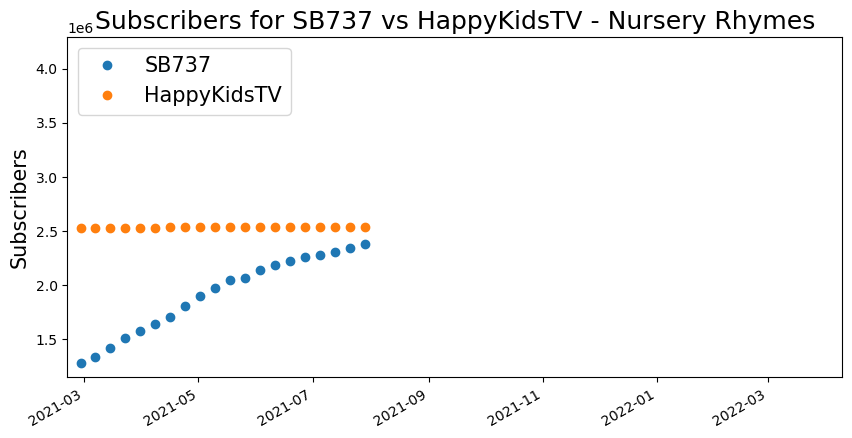

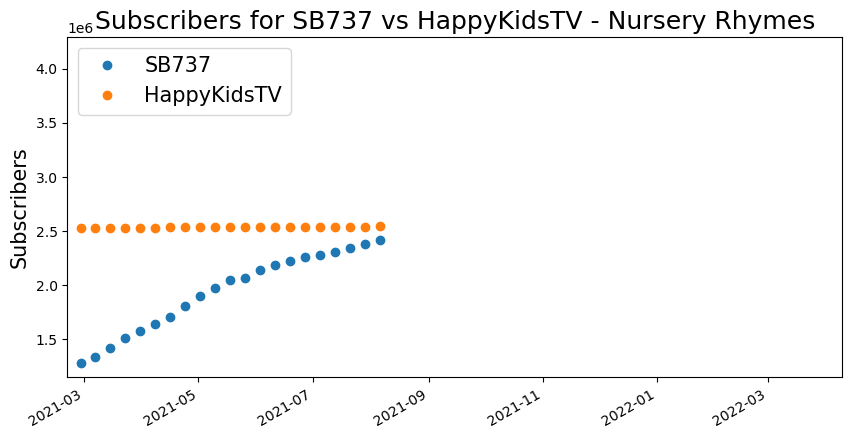

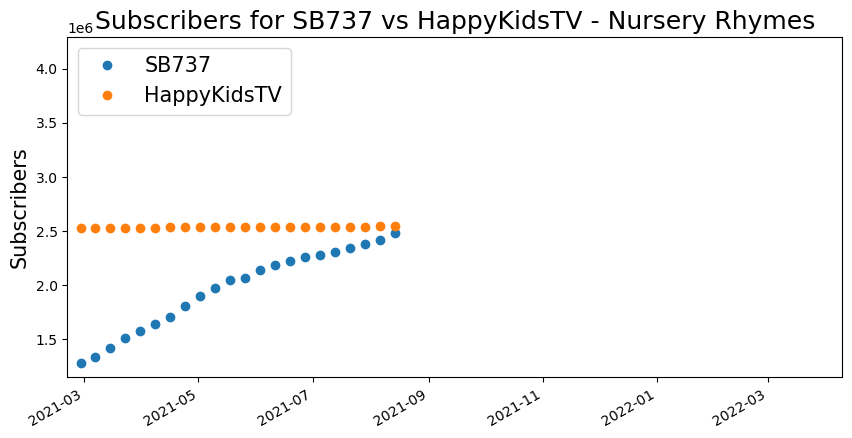

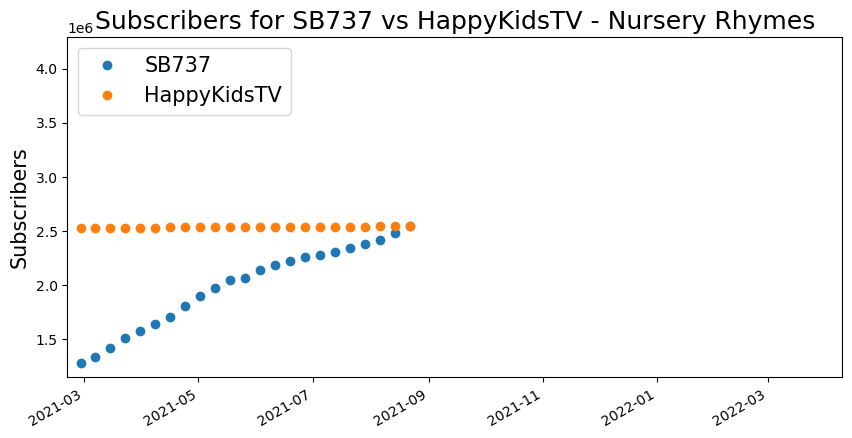

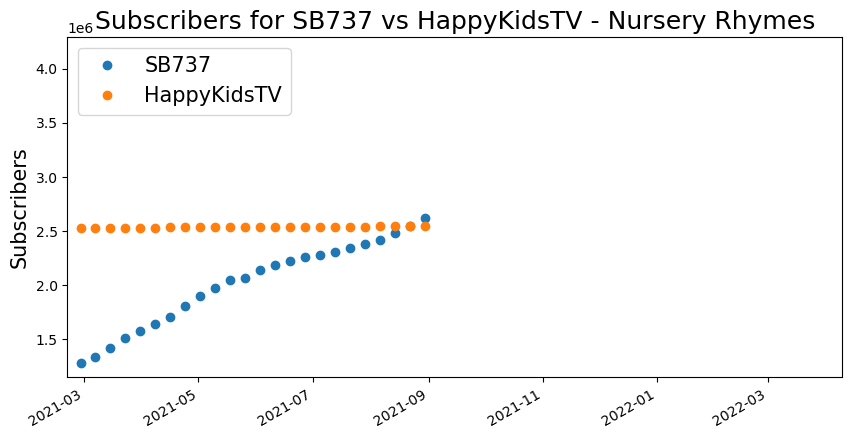

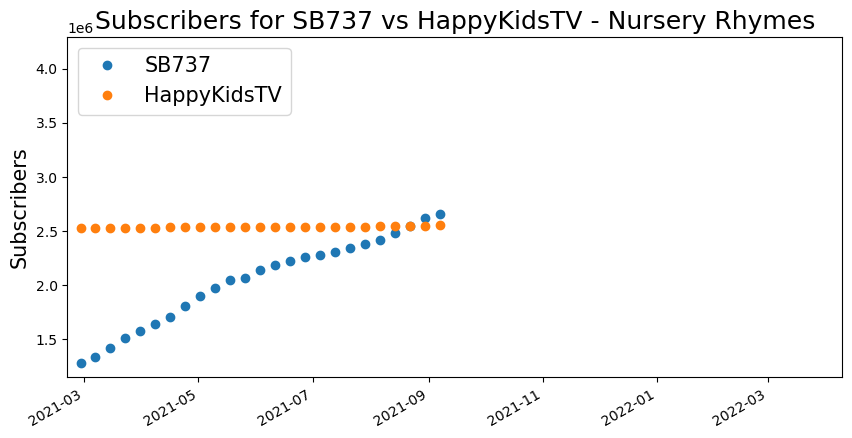

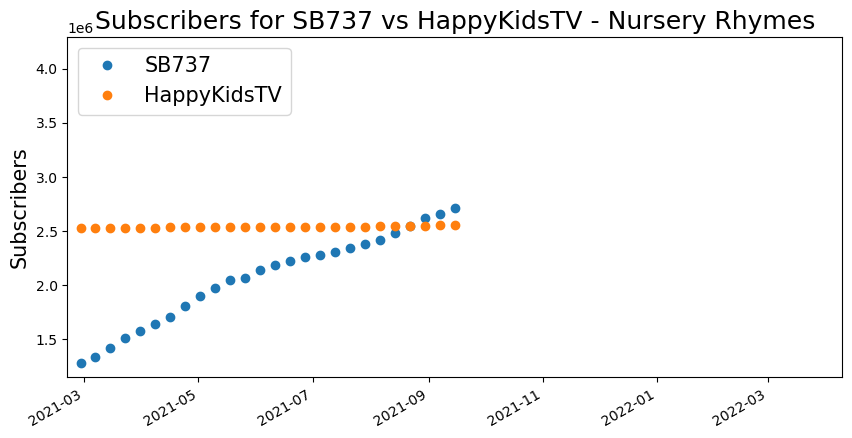

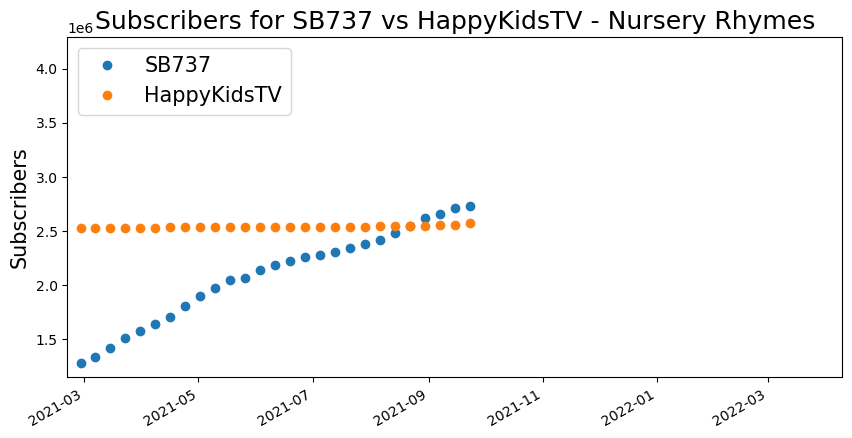

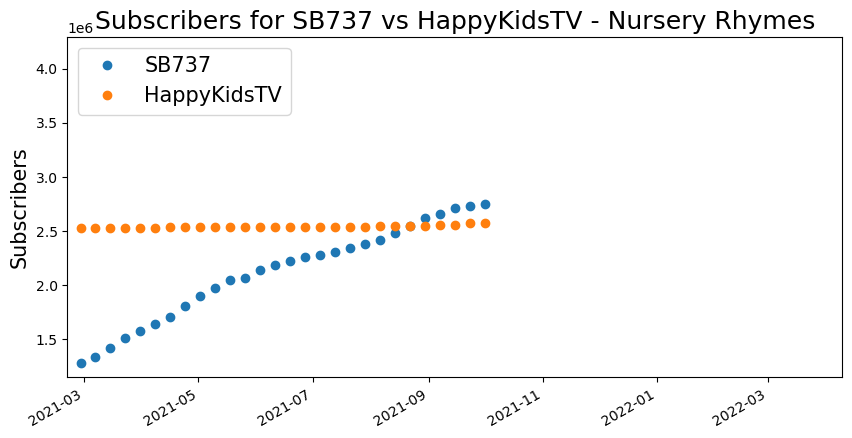

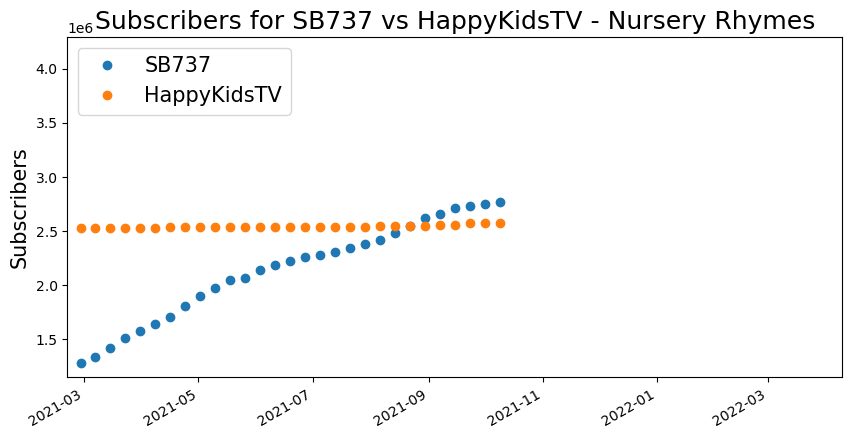

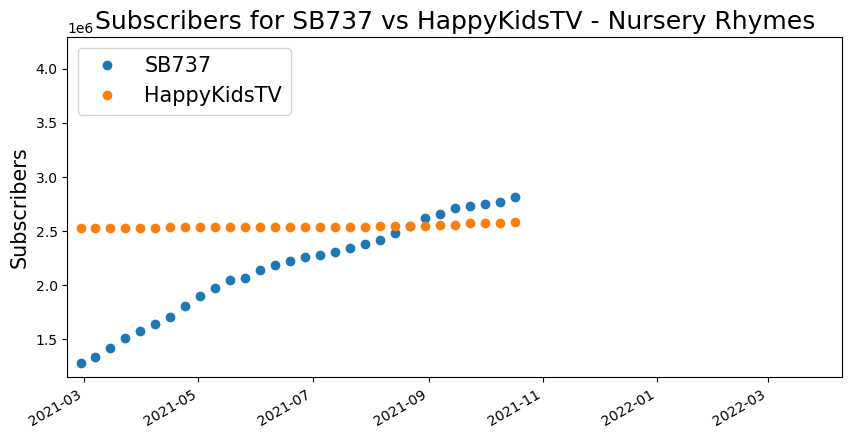

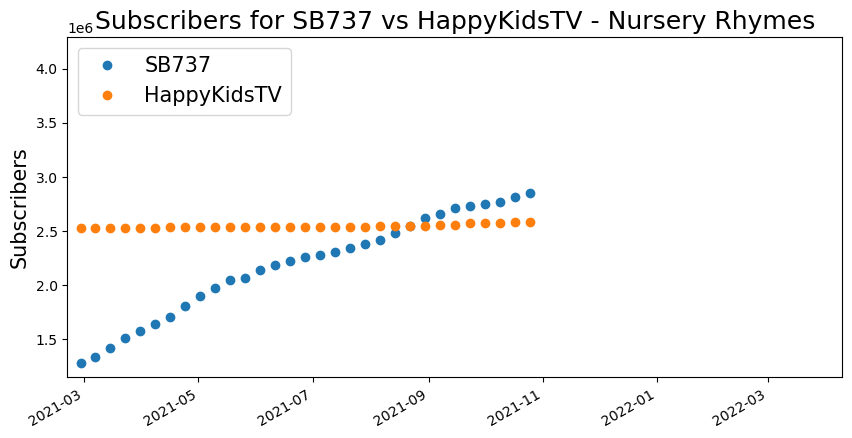

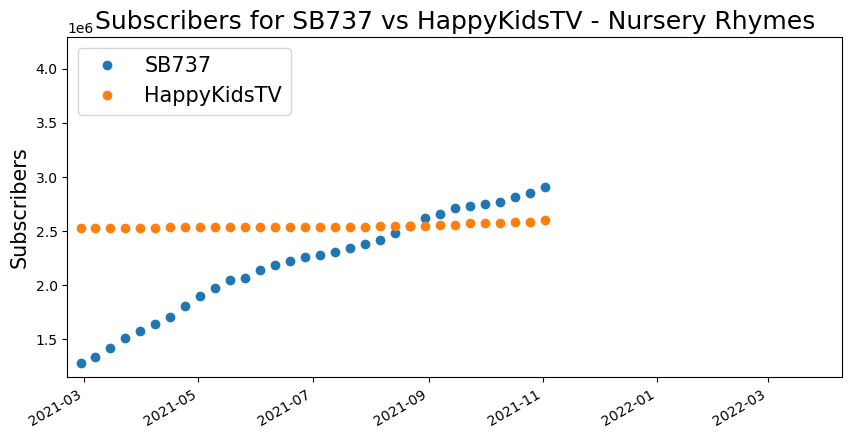

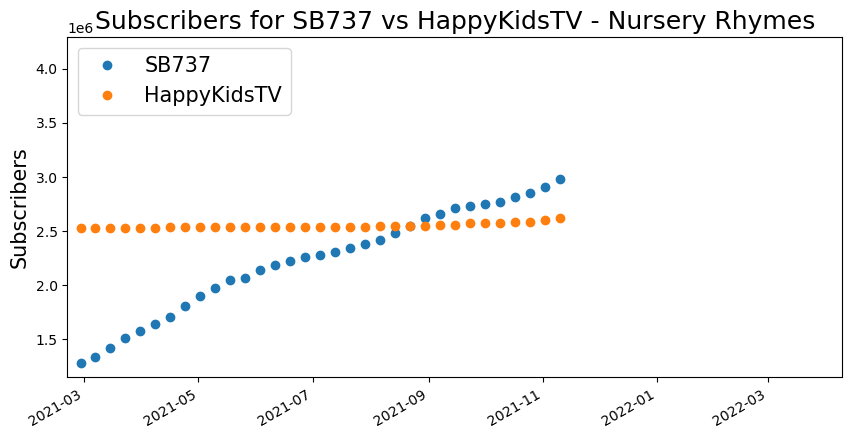

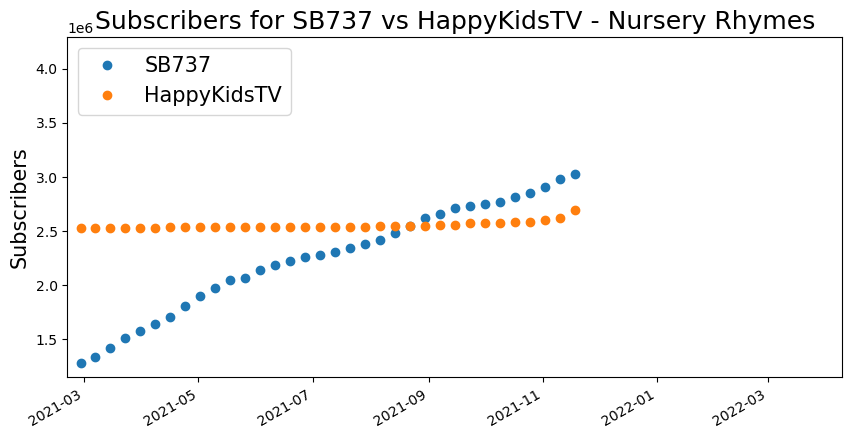

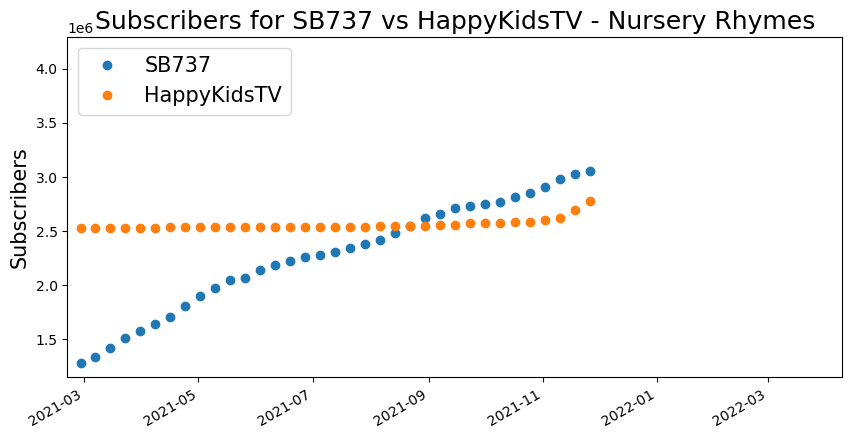

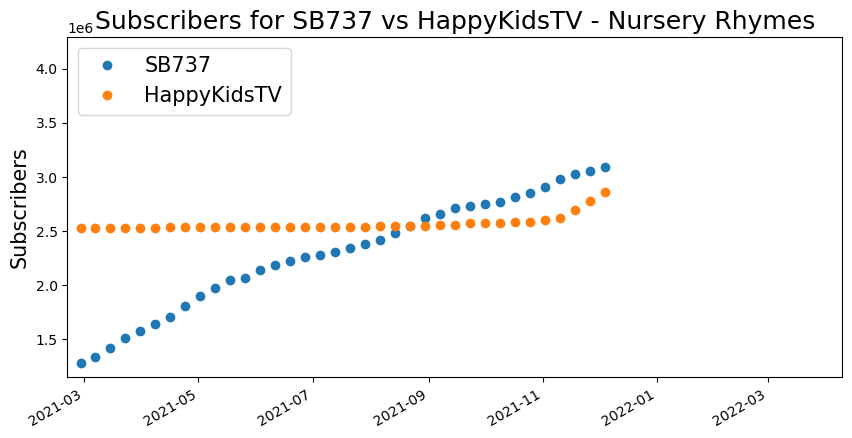

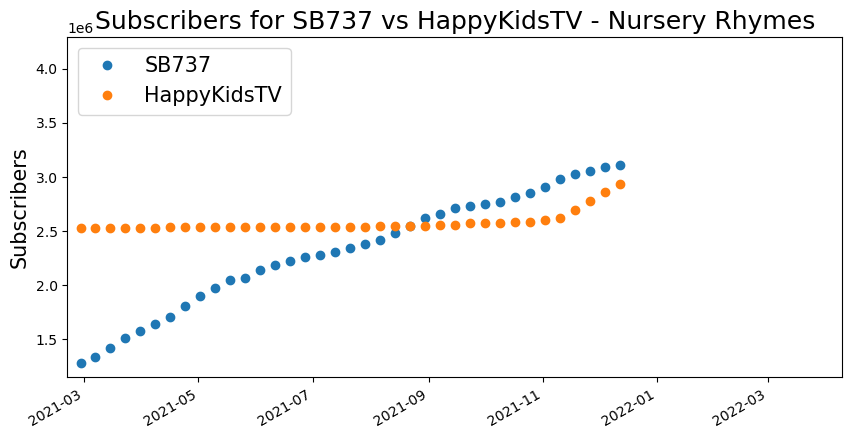

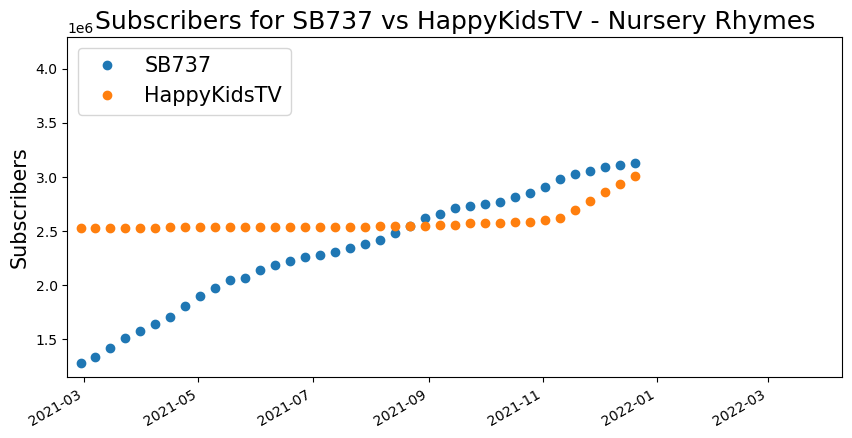

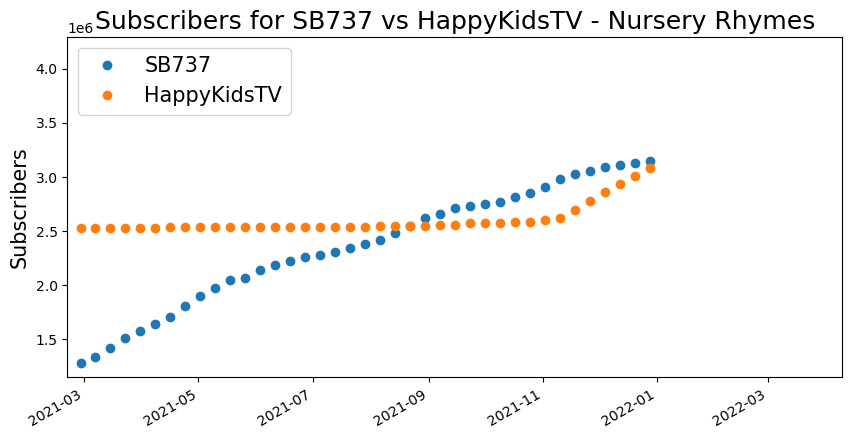

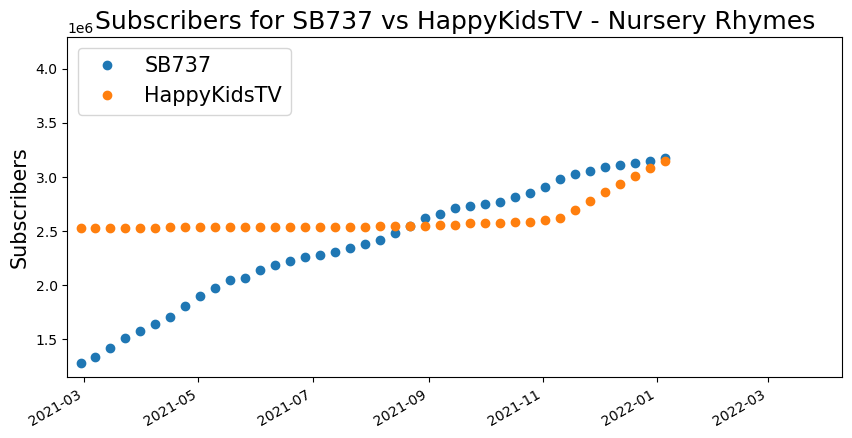

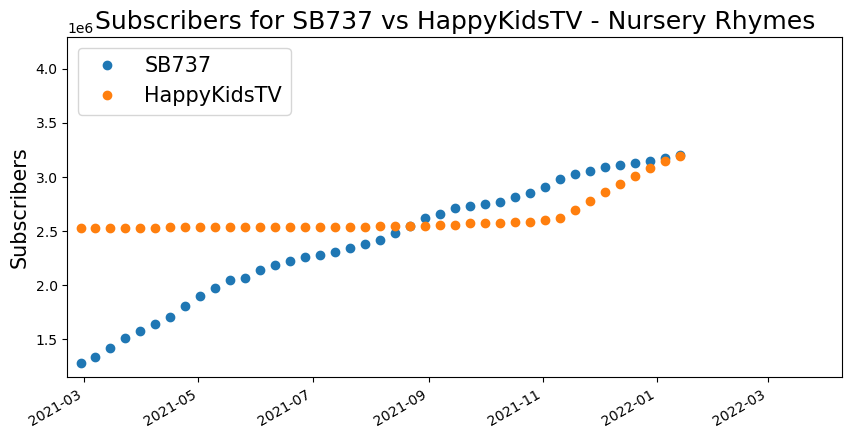

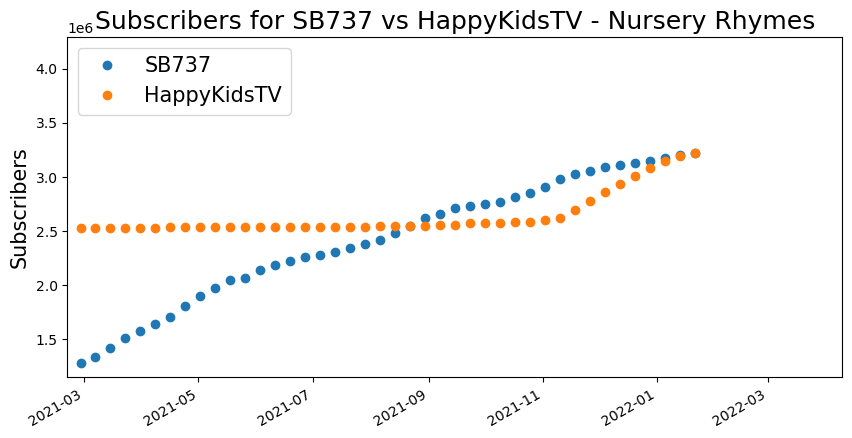

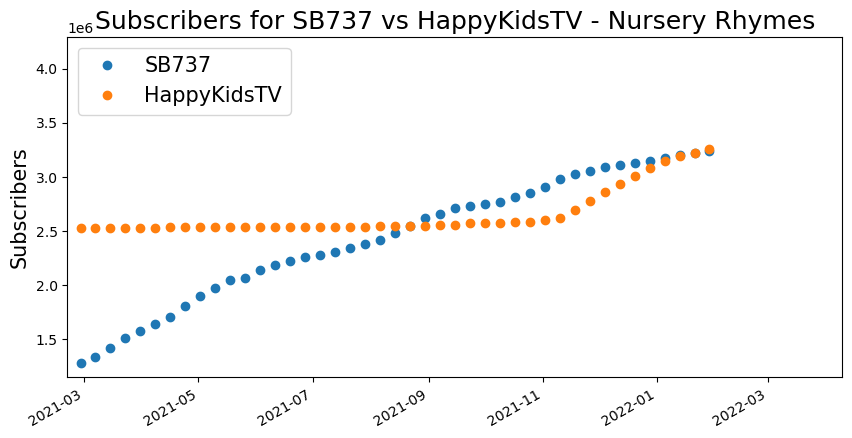

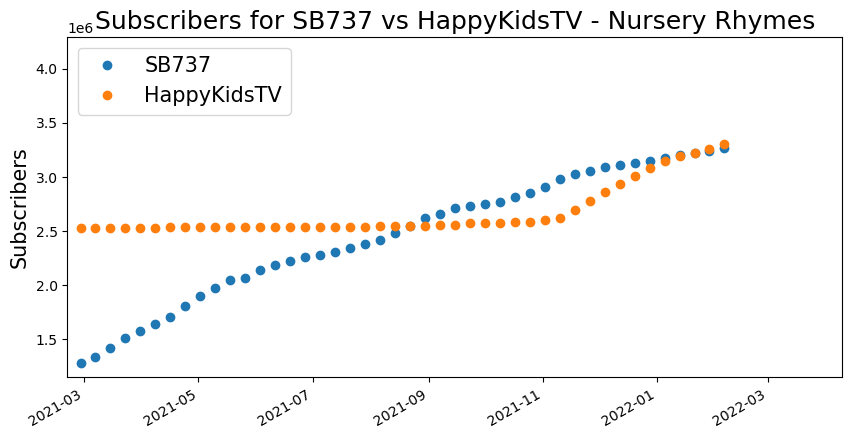

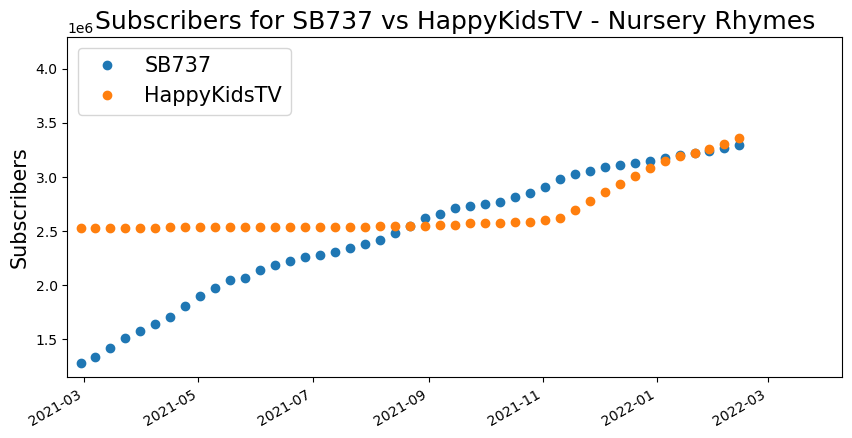

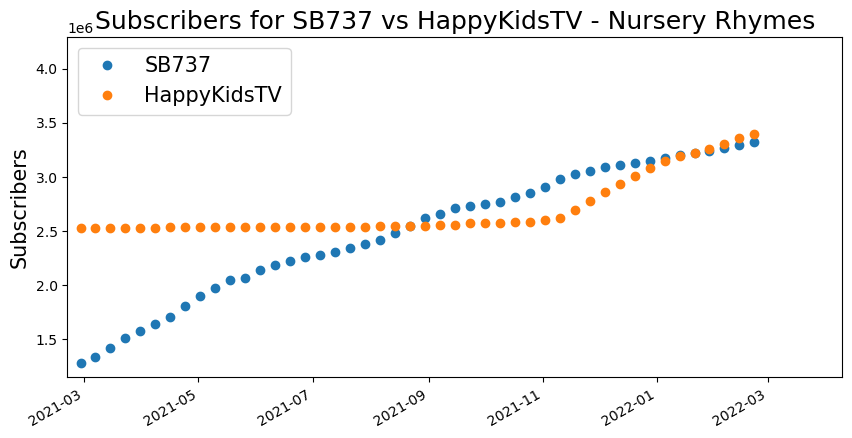

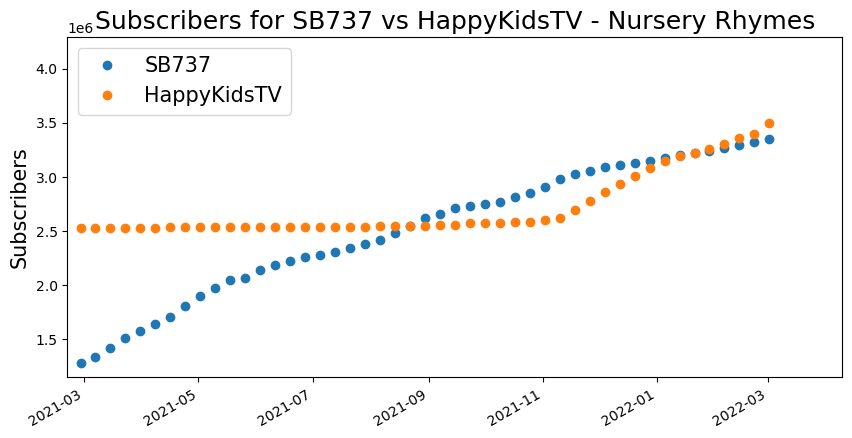

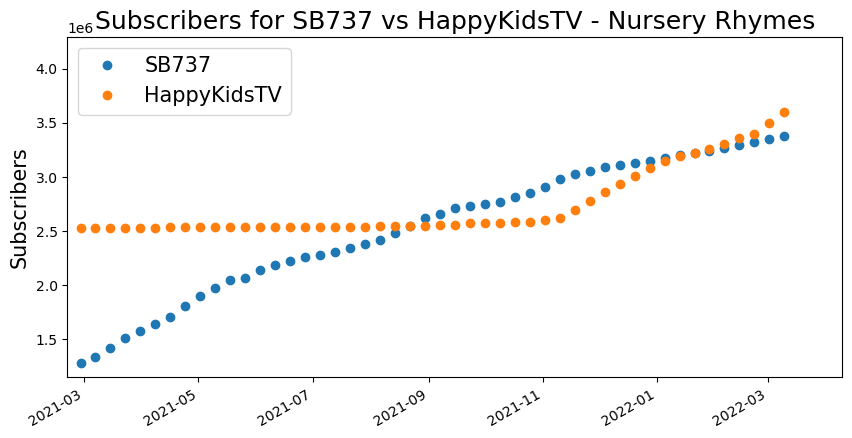

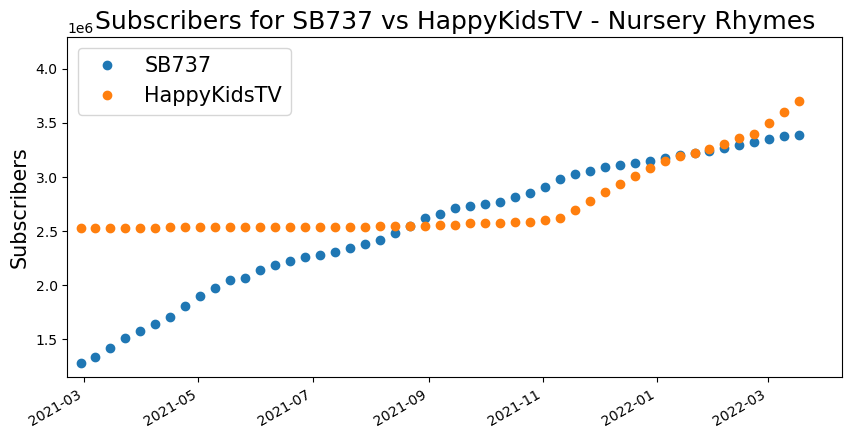

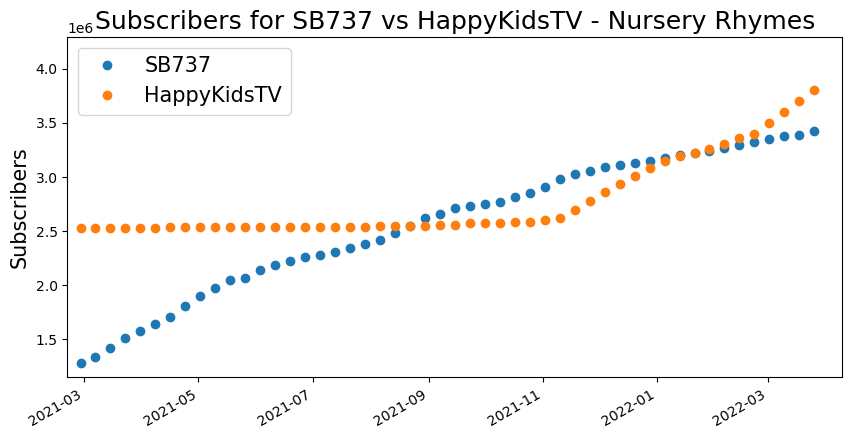

In [38]:
for i in range(len(dates)):
    fig = plt.figure(figsize=(10, 5), dpi=100)
    
    for data_index in range(len(data_lists)):
        plt.plot_date(number_dates[:i], data_lists[data_index][:i], label=labels[data_index], lw=linewidth)
    
    # Labels
    plt.legend(fontsize = legend_fontsize, loc='upper left')
    plt.title(title, fontsize=title_fontsize)
    plt.ylabel(y_label, fontsize=axis_fontsize)
    plt.xlim(number_dates[0] - 7, number_dates[-1] + 7)
    plt.ylim(smallest*0.9, biggest*1.1)
    
    # Make the plot
    plt.gcf().autofmt_xdate()
    plt.savefig(output_filename_base + "_" + str(i) + output_format)
    plt.show()

